# Scope

### Use inferential statistics and machine learning methods to create the best model for predicting the metric valence of spotify songs.

# Import Data 

### The dataset we will use is found in the following url: https://www.kaggle.com/rodolfofigueroa/spotify-12m-songs. 
### It contains audio features for over 1.2 million songs, obtained with the Spotify API. 

In [1]:
#import library pandas
import pandas as pd
import numpy as np
import scipy.stats.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import sklearn.metrics as metrics


%matplotlib inline

In [2]:
#import the dataset as dataframe
data = pd.read_csv("tracks_features.csv")

### The dataset consists of 1204025 observations with each observation being a unique song. Each observation includes 24 variables which are:

1) id: spotify track id
2) name: track title
3) album: album title
4) album_id: Spotify album ID
5) artist: list of artist names
6) artist_ids: list of Spotify artist IDs
7) track_number: 
8) disc_number:
9) explicit: whether the song is explicit in Spotify or not
10) danceability: how suitable a track is for dancing
11) energy: how intense and active a track is
12) key: overall key of the track
13) loudness: overall loudness of the track in decibels(DB)
14) mode: whether the track is in major mode (1) or minor (0)
15) speechiness: proportion of spoken words in the track
16) acousticness: confidence measure of whether a track is acoustic
17) instrumentalness: proportion of instrumental parts in a track
18) liveness: detects live audience in a track. represents the probability that a track was performed live
19) valence: measures how positive a track sounds, from 1 (extremely positive) to 0 (extremely negative)
20) tempo: overall tempo of a track, in beats per minute (BPM)
21) duration_ms: duration of a track, in milliseconds (ms)
22) time_signature:  a notational convention to specify how many beats are in each bar (or measure)
23) year: release date of track
24) release_date: full release date 

### Variable valence is our dependent variable and the rest variables are our predictors.

In [3]:
#The dataset
data

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


### We exclude the variables that offer no significant value to our model as they are not audio features of a song as Spotify specify them here:
https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features 

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-analysis

In [4]:
#drop columns
data = data.drop(['id','name','album','album_id','artists','artist_ids','track_number','disc_number','explicit','year','release_date'], axis=1)

### The dataset now includes 3 int variables and 10 float variables. Variables key, mode and time_signature are categorical variables and will be treated like this when needed.

In [5]:
# types of variables
data.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature      float64
dtype: object

### No empty or NaN values exist.

In [6]:
#find NaN Values
np.where(pd.isnull(data))

(array([], dtype=int64), array([], dtype=int64))

In [7]:
#find empty values
np.where(data.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

### Our final dataset is:

In [8]:
#the final dataset
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0
1,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0
2,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0
3,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0
4,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0.264,0.966,5,-6.970,0,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0
1204021,0.796,0.701,11,-6.602,0,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0
1204022,0.785,0.796,9,-5.960,0,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0
1204023,0.665,0.856,6,-6.788,0,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0


# Q1: Explore which Track Features Influence Valence using Inferential Statistics

## Descriptive Statistics and Model Choice

### Valence is a continuous variable that takes values between [0,1] with its mean value been equal to 0.43. A very small amount of observations takes value exactly at 0,1.

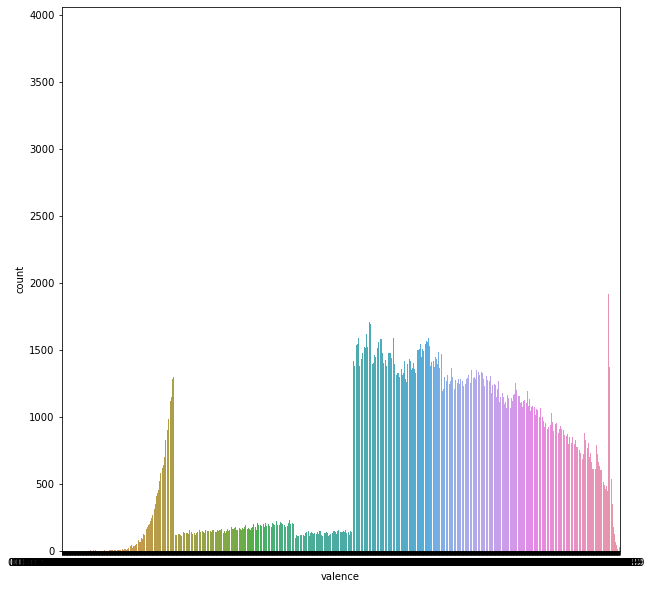

In [9]:
#Observe the frequency of values of valence
f = plt.figure(figsize=(10, 10))
ax = sns.countplot(x="valence",data=data)

In [10]:
#descriptive statistics
data.describe().round(decimals=2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1204025.00,1204025.00,1204025.00,1204025.00,1204025.00,1204025.00,1204025.00,1204025.00,1204025.00,1204025.00,1204025.00,1204025.00,1204025.00
mean,0.49,0.51,5.19,-11.81,0.67,0.08,0.45,0.28,0.20,0.43,117.63,248839.86,3.83
std,0.19,0.29,3.54,6.98,0.47,0.12,0.39,0.38,0.18,0.27,30.94,162210.36,0.56
min,0.00,0.00,0.00,-60.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1000.00,0.00
25%,0.36,0.25,2.00,-15.25,0.00,0.04,0.04,0.00,0.10,0.19,94.05,174090.00,4.00
50%,0.50,0.52,5.00,-9.79,1.00,0.04,0.39,0.01,0.12,0.40,116.73,224339.00,4.00
75%,0.63,0.77,8.00,-6.72,1.00,0.07,0.86,0.72,0.24,0.64,137.05,285840.00,4.00
max,1.00,1.00,11.00,7.23,1.00,0.97,1.00,1.00,1.00,1.00,248.93,6061090.00,5.00


### We will calculate the pairwise correlations of numeric variables. Valence is only, somewhat, positively correlated to danceability and so, data might not explain valence in a significant level. Energy seems negatively correlated to loudness and acousticness while loudness and acousticness are positively correlated. The high correlations could lead to possible problems of multicollinearity in our model, which affects inference as it increases the value of coefficients.

In [11]:
#numeric only dataset
data_num = data.drop(['key','mode','time_signature'], axis=1)
#categorical variables dataset
data_cat = data[['key','mode','time_signature']]

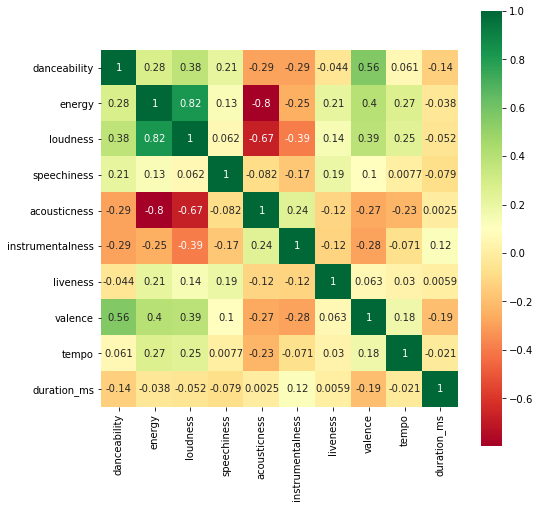

In [12]:
#pairwise correlation matrix plot
f = plt.figure(figsize=(8, 8))
p=sns.heatmap(data_num.corr(), annot=True,cmap='RdYlGn',square=True)

### We plot our data to see their distributions. It seems that a linear regression is not the correct type to choose for our model as any variable seems to follow a line against valence.

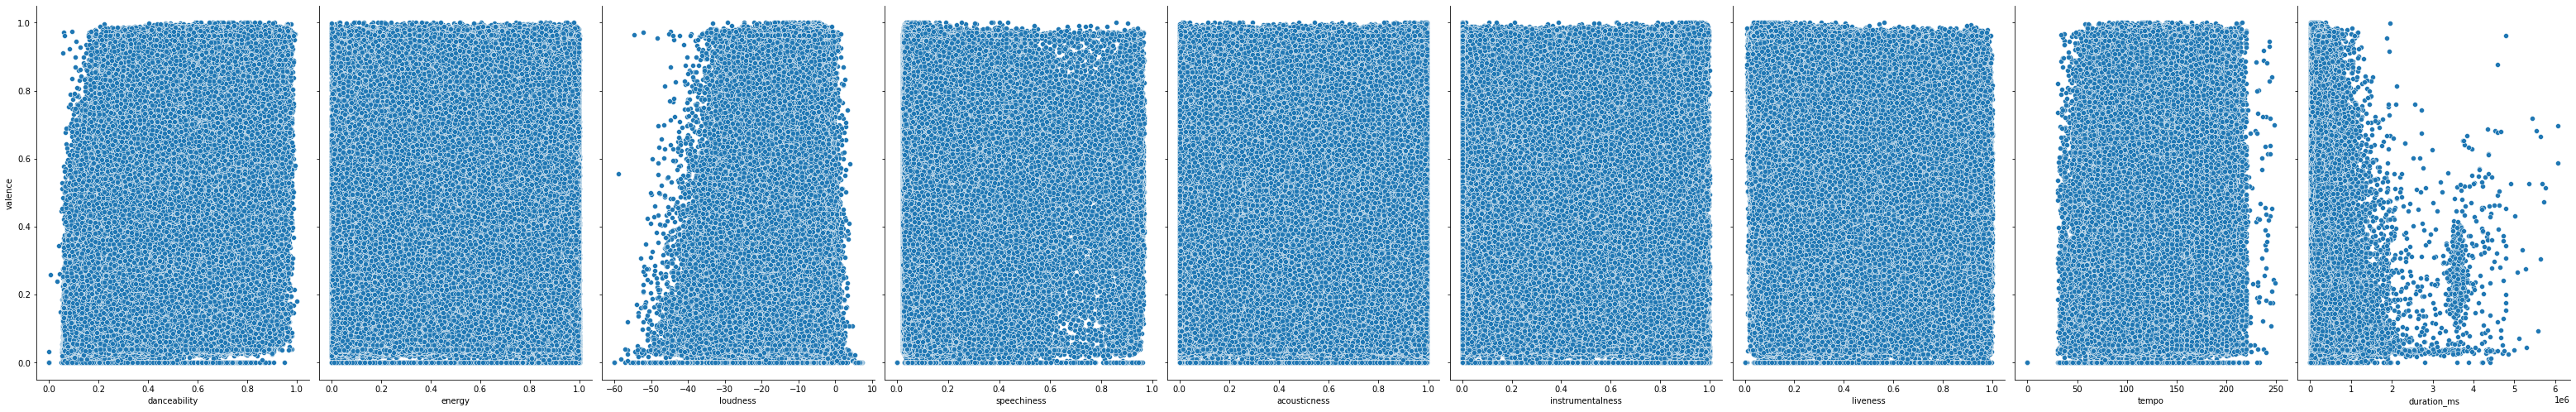

In [13]:
#plot numeric variables
sns.pairplot(data_num, x_vars=['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','tempo','duration_ms'], y_vars='valence', height=7, aspect=0.7)

<AxesSubplot:xlabel='time_signature', ylabel='valence'>

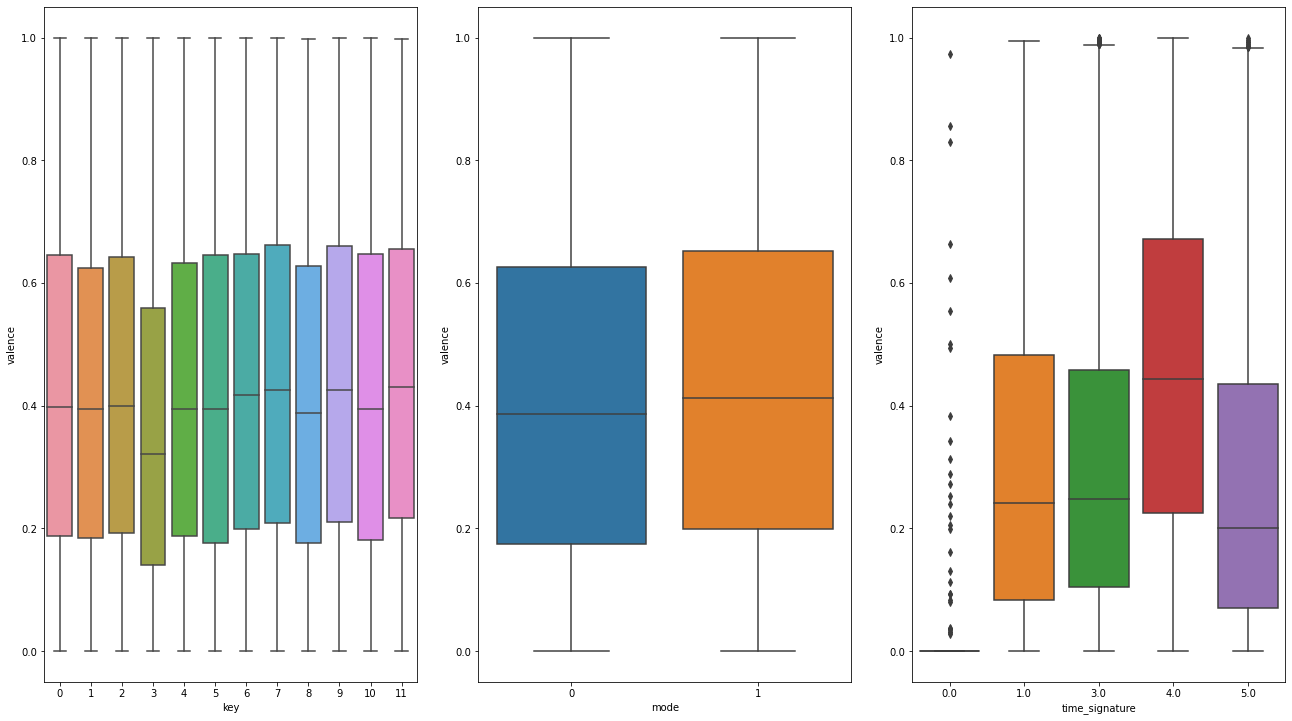

In [14]:
#plot catogorical variables
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(18.5, 10.5, forward=True)
fig.tight_layout(pad=3.0)
sns.boxplot(x = 'key', y='valence', data=data, ax=axs[0])
sns.boxplot(x = 'mode', y='valence', data=data, ax=axs[1])
sns.boxplot(x = 'time_signature', y='valence', data=data, ax=axs[2])

### The most appropriate regression to use is the Beta regression as valence is a continous variable in [0,1], in combination with a transformation in order to change the interval into (0,1) if needed. As Beta distribution has not been taught and logistic regression cannot be used for continuous variables in the interval [0,1], we will try to proceed using the ols regression and Normal Distribution of residuals in order to built our model. 

In [15]:
#ols regression
fullm = smf.ols(formula='valence ~ danceability + energy + C(key) + loudness + C(mode) + speechiness + acousticness + instrumentalness + liveness + tempo + duration_ms + C(time_signature)', data=data)
results  = fullm.fit()

### The adjusted R^2 is good been equal to 0.43 and all of our predictors are statistically significant. The Prob of F-Statistic is 0 meaning that our model is better than the constant-only model.

In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                 3.709e+04
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:36:31   Log-Likelihood:             2.0965e+05
No. Observations:             1204025   AIC:                        -4.192e+05
Df Residuals:                 1203999   BIC:                        -4.189e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.3005      0.004    -72.217      0.000      -0.309      -0.292
C(key)[T.1]                 -0.0401      0.001    -47.325      0.000      -0.042      -0.038
C(key)[T.2]                  0.0008      0.001      1.037      0.300      -0.001       0.002
C(key)[T.3]                 -0.0041      0.001     -3.592      0.000      -0.006      -0.002
C(key)[T.4]                 -0.0047      0.001     -5.507      0.000      -0.006      -0.003
C(key)[T.5]                  0.0061      0.001      7.328      0.000       0.004       0.008
C(key)[T.6]                 -0.0087      0.001     -8.942      0.000      -0.011      -0.007
C(key)[T.7]                  0.0059      0.001      8.016      0.000       0.004       0.007
C(key)[T.8]                 -0.0187      0.001    -19.549      0.000      -0.021      -0.017
C(key)[T.9]                  0.0089      0.001     11.567      0.000       0.007       0.010
C(key)[T.10]                -0.0026      0.001     -2.886      0.004      -0.004      -0.001
C(key)[T.11]                -0.0061      0.001     -6.778      0.000      -0.008      -0.004
C(mode)[T.1]                 0.0256      0.000     62.215      0.000       0.025       0.026
C(time_signature)[T.1.0]    -0.0051      0.004     -1.218      0.223      -0.013       0.003
C(time_signature)[T.3.0]    -0.0124      0.004     -3.115      0.002      -0.020      -0.005
C(time_signature)[T.4.0]     0.0039      0.004      0.972      0.331      -0.004       0.012
C(time_signature)[T.5.0]    -0.0250      0.004     -6.082      0.000      -0.033      -0.017
danceability                 0.7088      0.001    618.635      0.000       0.707       0.711
energy                       0.4387      0.001    310.005      0.000       0.436       0.441
loudness                    -0.0047   5.11e-05    -92.844      0.000      -0.005      -0.005
speechiness                 -0.1505      0.002    -87.105      0.000      -0.154      -0.147
acousticness                 0.1520      0.001    187.405      0.000       0.150       0.154
instrumentalness            -0.0781      0.001   -139.378      0.000      -0.079      -0.077
liveness                     0.0308      0.001     28.334      0.000       0.029       0.033
tempo                        0.0008   6.36e-06    118.796      0.000       0.001       0.001
duration_ms              -1.736e-07   1.17e-09   -148.515      0.000   -1.76e-07   -1.71e-07
==============================================================================
Omnibus:                     3166.090   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3116.368
Skew:                           0.113   Prob(JB):                         0.00
Kurtosis:                       2.894   Cond. No.                     

## Variable elimination

### We perform bothway stepwise procedures in order to minimize the number of independent variables in our model.

### Firstly, we create a Matrix X where we store our observations. 

In [17]:
def process_subset(y, data, feature_set):
    X = data.loc[:, feature_set].values
    X = sm.add_constant(X)
    names = ['intercept']
    names.extend(feature_set)
    model = sm.OLS(y, X)
    model.data.xnames = names
    regr = model.fit()
    return regr
    

### Afterwards, we create a function that will keep k number of independent variables in our model and choose from all the different combinations of the 12 independent variables the ones with the best R^2 for each k combination.

In [18]:
import itertools

def get_best_of_k(y, data, k):
    
    best_rsquared = 0
    best_model = None
    for comb in itertools.combinations(data.columns, k):
        regr = process_subset(y, data, comb)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr

    return best_model

###  Finally, we create a function that will find the best overall model from the best models found in the step before having as a criterion the adjusted R^2. 

In [19]:
def best_subset_selection(data, exog):
    best_model = None
    best_models = []
    y = data.loc[:, exog]
    endog = [ x for x in data.columns if x != exog ]
    X = data.loc[:, endog]

    for i in range(1, len(data.columns)):
        print(f'Finding the best model for {i} variable{"s" if i > 1 else ""}')
        model = get_best_of_k(y, X, i)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(model.model.data.xnames[1:]) # get the variables minums the intercept
        best_models.append(model)

    print(f'Fitted {2**len(data.columns)} models')
    return best_model, best_models

### The best model does not exclude any variable from the full model.

In [20]:
#best_model, _ = best_subset_selection(data, 'valence')
#print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

## Check Assumptions

### We check for Multicollinearity using the Variance Inflation Factor, as it affects homoscedasticity. As expected from the pairwised correlations matrix, energy has a VIF of 5.41>5 and so multicollinearity exists.

In [21]:
#VIF Test 
X = add_constant(data_num)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
          index=X.columns)

const               89.452814
danceability         1.733798
energy               5.399557
loudness             3.703168
speechiness          1.144053
acousticness         2.897141
instrumentalness     1.308447
liveness             1.118796
valence              1.755503
tempo                1.096592
duration_ms          1.053034
dtype: float64

### We exclude variables loudness and acousticness as they are explained by variable energy and are less correlated to valence than energy. The multicollinearity problem is fixed.

In [22]:
#exclude loudness and acousticness
data1 = data.drop(['loudness', 'acousticness'], axis=1)

### The new model has decreased adjusted R-squared as 2 variables were excluded but it is alligned to ols regression assumption of non-multicollinearity.

In [23]:
#new model
m1 = smf.ols(formula='valence ~ danceability + energy + C(key) + C(mode) + speechiness + instrumentalness + liveness + tempo + duration_ms + C(time_signature)', data=data1).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                 3.705e+04
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:36:50   Log-Likelihood:             1.8804e+05
No. Observations:             1204025   AIC:                        -3.760e+05
Df Residuals:                 1204001   BIC:                        -3.757e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.0563      0.004    -14.220      0.000      -0.064      -0.049
C(key)[T.1]                 -0.0449      0.001    -52.124      0.000      -0.047      -0.043
C(key)[T.2]                  0.0007      0.001      0.953      0.341      -0.001       0.002
C(key)[T.3]                  0.0023      0.001      1.959      0.050   -1.03e-06       0.005
C(key)[T.4]                 -0.0048      0.001     -5.570      0.000      -0.006      -0.003
C(key)[T.5]                  0.0091      0.001     10.731      0.000       0.007       0.011
C(key)[T.6]                 -0.0104      0.001    -10.490      0.000      -0.012      -0.008
C(key)[T.7]                  0.0059      0.001      7.926      0.000       0.004       0.007
C(key)[T.8]                 -0.0181      0.001    -18.617      0.000      -0.020      -0.016
C(key)[T.9]                  0.0092      0.001     11.749      0.000       0.008       0.011
C(key)[T.10]                -0.0006      0.001     -0.663      0.507      -0.002       0.001
C(key)[T.11]                -0.0084      0.001     -9.196      0.000      -0.010      -0.007
C(mode)[T.1]                 0.0267      0.000     63.718      0.000       0.026       0.027
C(time_signature)[T.1.0]     0.0197      0.004      4.605      0.000       0.011       0.028
C(time_signature)[T.3.0]     0.0079      0.004      1.939      0.053   -8.53e-05       0.016
C(time_signature)[T.4.0]     0.0206      0.004      5.116      0.000       0.013       0.029
C(time_signature)[T.5.0]    -0.0034      0.004     -0.817      0.414      -0.012       0.005
danceability                 0.6685      0.001    588.532      0.000       0.666       0.671
energy                       0.2029      0.001    271.337      0.000       0.201       0.204
speechiness                 -0.1116      0.002    -64.293      0.000      -0.115      -0.108
instrumentalness            -0.0549      0.001   -101.521      0.000      -0.056      -0.054
liveness                     0.0503      0.001     45.666      0.000       0.048       0.052
tempo                        0.0007   6.46e-06    105.880      0.000       0.001       0.001
duration_ms              -1.893e-07   1.19e-09   -159.408      0.000   -1.92e-07   -1.87e-07
==============================================================================
Omnibus:                     5304.896   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5063.674
Skew:                           0.135   Prob(JB):                         0.00
Kurtosis:                       2.832   Cond. No.                     1.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

### We perform the shapiro test to check for the Normality of the residuals. As p-value<0.05, which is our level of significance, we reject Ho that residuals are Normally Distributed.

In [24]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(m1.resid.to_frame())
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\sgsid\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.


### We use the QQ plot to check the Normality of residuals in order to be sure. Residuals are not normal in the tails.

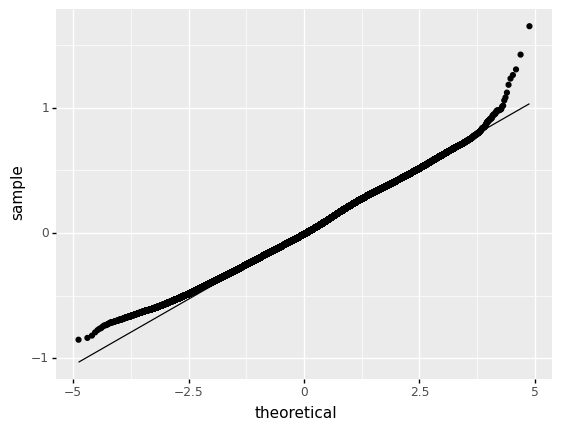

<ggplot: (126839360061)>

In [25]:
ggplot(data=m1.resid.to_frame().rename(columns={0: 'resid'})) +\
    geom_qq(mapping=aes(sample='resid')) +\
    geom_qq_line(mapping=aes(sample='resid'))

### We plot the residuals against the fitted values to see if there is constant variance. Heteroscedasticity problem exists.

Text(0, 0.5, 'Residuals')

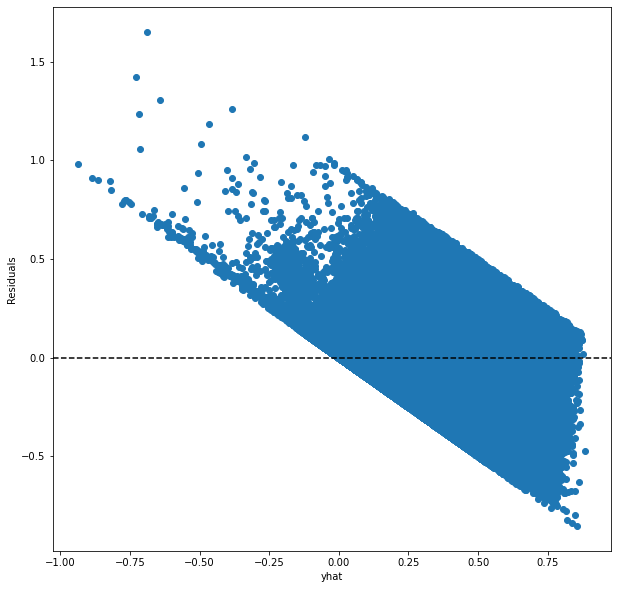

In [26]:
#plot residuals against fitted values
plt.figure(figsize=(10,10))
_ = plt.scatter(m1.fittedvalues, m1.resid)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('yhat')
plt.ylabel('Residuals') 

### We plot the fitted values against the true values to see if there is non-linearity of residuals. It is clear that non-linearity exists.

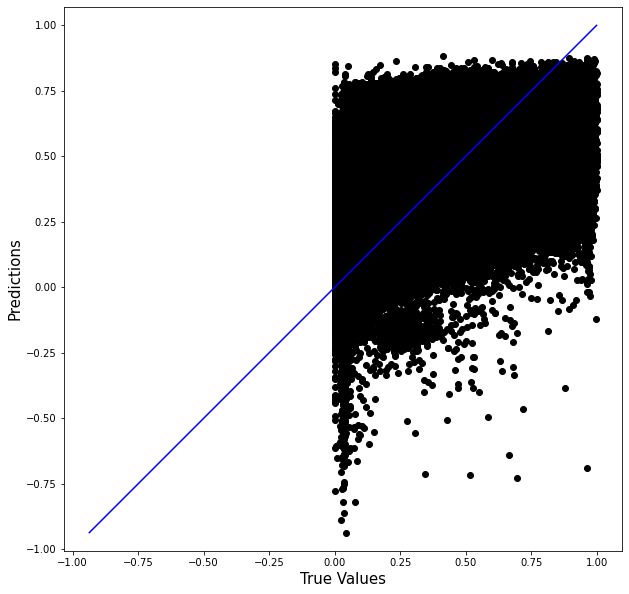

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(data.valence, m1.fittedvalues, c='black')
p1 = max(max(m1.fittedvalues), max(data.valence))
p2 = min(min(m1.fittedvalues), min(data.valence))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### Check for Autocorrelation with the following autocorrelation plot included in staticmodels and the Durbin-Watson test. It seems that autocorrelation exists as durbin-watson test-value is not between [1.5,2.5] and residuals follow a pattern.

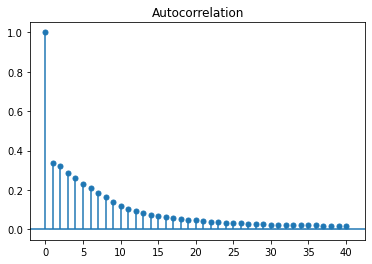

In [28]:
_ = sm.graphics.tsa.plot_acf(m1.resid, lags=40, alpha=0.05)

In [29]:
from statsmodels.stats.stattools import durbin_watson
#perform Durbin-Watson test
durbin_watson(m1.resid)

1.3295492181362332

## Try to improve Assumptions

### Normality Assumption is usually fixed by using Log or Square root transformation of the targeted variable. As valence takes values in [0,1] log transformation is not possible and we will continue with the Square root transformation.

In [30]:
#create log-transformed data
data2 = data1.copy()
data2['valence_trans'] = np.sqrt(data2.valence)
data2 = data2.drop('valence',axis=1)

In [31]:
m2 = smf.ols(formula='valence_trans ~ danceability + energy + C(key) + C(mode) + speechiness + instrumentalness + liveness + tempo + duration_ms + C(time_signature)', data=data2).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          valence_trans   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                 4.461e+04
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:41:00   Log-Likelihood:             4.3463e+05
No. Observations:             1204025   AIC:                        -8.692e+05
Df Residuals:                 1204001   BIC:                        -8.689e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.0435      0.003    -13.482      0.000      -0.050      -0.037
C(key)[T.1]                 -0.0374      0.001    -53.317      0.000      -0.039      -0.036
C(key)[T.2]                  0.0017      0.001      2.701      0.007       0.000       0.003
C(key)[T.3]                  0.0029      0.001      3.082      0.002       0.001       0.005
C(key)[T.4]                 -0.0034      0.001     -4.860      0.000      -0.005      -0.002
C(key)[T.5]                  0.0068      0.001      9.826      0.000       0.005       0.008
C(key)[T.6]                 -0.0088      0.001    -10.894      0.000      -0.010      -0.007
C(key)[T.7]                  0.0055      0.001      8.985      0.000       0.004       0.007
C(key)[T.8]                 -0.0153      0.001    -19.315      0.000      -0.017      -0.014
C(key)[T.9]                  0.0083      0.001     12.990      0.000       0.007       0.010
C(key)[T.10]                -0.0012      0.001     -1.563      0.118      -0.003       0.000
C(key)[T.11]                -0.0064      0.001     -8.564      0.000      -0.008      -0.005
C(mode)[T.1]                 0.0222      0.000     65.108      0.000       0.022       0.023
C(time_signature)[T.1.0]     0.2469      0.003     70.946      0.000       0.240       0.254
C(time_signature)[T.3.0]     0.2428      0.003     73.598      0.000       0.236       0.249
C(time_signature)[T.4.0]     0.2537      0.003     77.227      0.000       0.247       0.260
C(time_signature)[T.5.0]     0.2252      0.003     66.116      0.000       0.219       0.232
danceability                 0.5795      0.001    626.143      0.000       0.578       0.581
energy                       0.1740      0.001    285.605      0.000       0.173       0.175
speechiness                 -0.0947      0.001    -66.944      0.000      -0.097      -0.092
instrumentalness            -0.0620      0.000   -140.721      0.000      -0.063      -0.061
liveness                     0.0533      0.001     59.308      0.000       0.051       0.055
tempo                        0.0006   5.27e-06    120.648      0.000       0.001       0.001
duration_ms              -1.661e-07   9.68e-10   -171.665      0.000   -1.68e-07   -1.64e-07
==============================================================================
Omnibus:                    11673.425   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12043.601
Skew:                          -0.239   Prob(JB):                         0.00
Kurtosis:                       3.108   Cond. No.                     1.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

### The normality seems to be improved but residuals are still not normal. The interpretation of the model also becomes difficult.

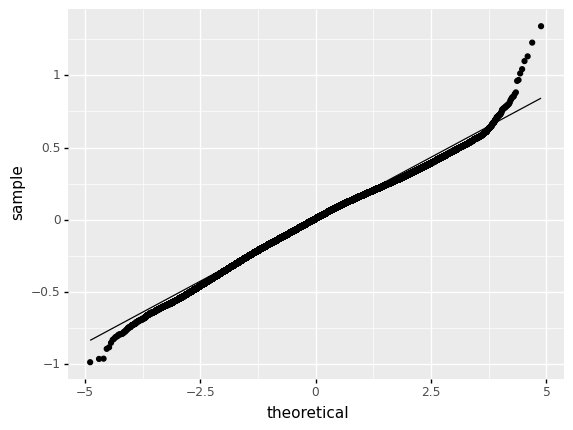

<ggplot: (126839498734)>

In [32]:
ggplot(data=m2.resid.to_frame().rename(columns={0: 'resid'})) +\
    geom_qq(mapping=aes(sample='resid')) +\
    geom_qq_line(mapping=aes(sample='resid'))

### We will try to add polynomials to numeric variables affecting valence the most, in order to try and improve non-linearity problem. We reach up to polynomial of 4th degree. Rsquared is improved to 0.48 but the interpretation of the model becomes very difficult.

In [33]:
m3 = smf.ols(formula='valence_trans ~ danceability + np.power(danceability, 2) + np.power(danceability, 3)+np.power(danceability, 4)+ energy + np.power(energy, 2)+ np.power(energy, 3)+np.power(energy, 4) + C(key) + C(mode) + speechiness+np.power(speechiness, 2)+np.power(speechiness, 3)+np.power(speechiness, 4)  + instrumentalness+np.power(instrumentalness, 2)+np.power(instrumentalness, 3)++np.power(instrumentalness, 4) + liveness + np.power(liveness, 2)+ liveness + np.power(liveness, 3)+np.power(liveness, 4) +tempo + duration_ms + C(time_signature)', data=data2).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          valence_trans   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                 2.940e+04
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:41:46   Log-Likelihood:             4.5876e+05
No. Observations:             1204025   AIC:                        -9.174e+05
Df Residuals:                 1203986   BIC:                        -9.170e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.0490      0.003    -14.943      0.000      -0.055      -0.043
C(key)[T.1]                      -0.0305      0.001    -44.228      0.000      -0.032      -0.029
C(key)[T.2]                       0.0018      0.001      2.909      0.004       0.001       0.003
C(key)[T.3]                       0.0056      0.001      5.986      0.000       0.004       0.007
C(key)[T.4]                      -0.0032      0.001     -4.673      0.000      -0.005      -0.002
C(key)[T.5]                       0.0080      0.001     11.735      0.000       0.007       0.009
C(key)[T.6]                      -0.0049      0.001     -6.243      0.000      -0.006      -0.003
C(key)[T.7]                       0.0060      0.001      9.976      0.000       0.005       0.007
C(key)[T.8]                      -0.0111      0.001    -14.273      0.000      -0.013      -0.010
C(key)[T.9]                       0.0079      0.001     12.548      0.000       0.007       0.009
C(key)[T.10]                      0.0020      0.001      2.668      0.008       0.001       0.003
C(key)[T.11]                     -0.0034      0.001     -4.625      0.000      -0.005      -0.002
C(mode)[T.1]                      0.0200      0.000     59.674      0.000       0.019       0.021
C(time_signature)[T.1.0]          0.2268      0.004     53.752      0.000       0.219       0.235
C(time_signature)[T.3.0]          0.2216      0.004     54.364      0.000       0.214       0.230
C(time_signature)[T.4.0]          0.2324      0.004     57.205      0.000       0.224       0.240
C(time_signature)[T.5.0]          0.2055      0.004     49.419      0.000       0.197       0.214
danceability                      0.5455      0.027     20.308      0.000       0.493       0.598
np.power(danceability, 2)         0.8648      0.096      9.024      0.000       0.677       1.053
np.power(danceability, 3)        -1.6190      0.138    -11.715      0.000      -1.890      -1.348
np.power(danceability, 4)         0.7030      0.069     10.155      0.000       0.567       0.839
energy                            0.8218      0.010     79.340      0.000       0.801       0.842
np.power(energy, 2)              -3.0396      0.042    -71.898      0.000      -3.122      -2.957
np.power(energy, 3)               5.3920      0.064     84.636      0.000       5.267       5.517
np.power(energy, 4)              -3.0684      0.032    -96.824      0.000      -3.130      -3.006
speechiness                      -0.0849      0.015     -5.693      0.000      -0.114      -0.056
np.power(speechiness, 2)         -0.8151      0.084     -9.700      0.000      -0.980      -0.650
np.power(speechiness, 3)          2.4163      0.162     14.873      0.000       2.098       2.735
np.power(speechiness, 4)         -1.5654     

### Non linearity problem is not fixed.

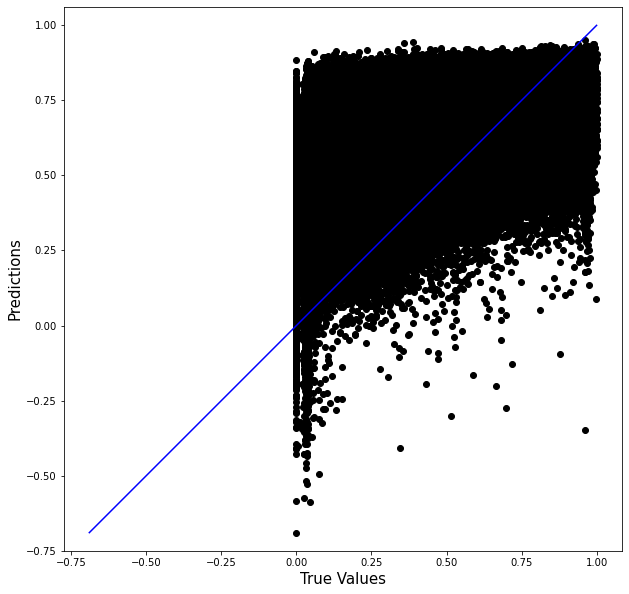

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(data.valence, m3.fittedvalues, c='black')
p1 = max(max(m3.fittedvalues), max(data.valence))
p2 = min(min(m3.fittedvalues), min(data.valence))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Best model choice

### We will use anova to choose for the best model between m2 & m3. We reject Ho that the two models fit data equally well, so our best model is m3.

In [35]:
table = sm.stats.anova_lm(m2,m3)
table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1204001.0,34246.407640,0.0,NaN,NaN,NaN
1,1203986.0,32901.047175,15.0,1345.360465,3282.155237,0.0


## Conclusion

### We used the ols regression as the only achievable alternative. The assumptions needed are violated and we tried to improve them with target variable square root transformation and polynomial terms but it has no effect. The final model explains the difference between actual and predicted values by 48% but it will fail to fit accurately on different data as assumptions are rejected. The interpretation of the model after all the transformations is very difficult to perform but in general, it seems that danceability, energy (positively) and instrumentalness, liveness (negatively) describe valence the most. 

# Q2: Predict Valence using 3 Machine Learning methods

### We will take a random sample from the dataset as the computational power of our computer is not enough to handle fast such a size of data for machine learning methods. The sample includes 200.000 observations.

In [36]:
#taking sample
data_sample = data.sample(200000)

### We will create dummy variables for the categorical variables key, mode and time_signature. 

In [37]:
# create dummies 
data_sample = pd.get_dummies(data_sample, columns=['key'], drop_first=True)
data_sample = pd.get_dummies(data_sample, columns=['mode'], drop_first=True)
data_sample = pd.get_dummies(data_sample, columns=['time_signature'], drop_first=True)

### As valence is a continuous variable we should use regression machine learning methods for prediction, but as the majority of ML methods been taught are for classification and we need at least three of them, we will also proceed with classification machine learning methods. As a result, we will perform a regression method based on the one been taught and 3 classification methods of our choice.

## For the Regression approach:

## 1) Random Forest

### We will separate our dataset to training and testing datasets to avoid overfitting. The testing dataset will be 25% of the initial.

In [38]:
data3 = data_sample.copy()
# Get 2 dataframes with the values of independent and dependent variables
X1, y1 = (data3.loc[:, data3.columns != 'valence'].values, 
        data3['valence'].values)

# Split them both into a training and a testing set
# Test set will be the 25% of the initials taken randomly
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, 
                                                    random_state=33)

### The method creates split points based on the variance reduction each split produces (variance reduction must be maximized) until a max depth of splits is performed. The collection of trees is uncorrelated and not affected by a very strong predictor in the data set offering us completely different trees. The method has an accuracy on prediction of 53% and a mean absolute error of 14.48%.

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
#the method
clf = RandomForestRegressor(n_estimators = 50, max_depth=None,min_samples_split=2, random_state = 0,n_jobs=-1)
#train the method
clf.fit(X_train1, y_train1)
#cross validation
feature_cols = [ col for col in data3.columns if col != 'valence' ]
scores = cross_val_score(clf, data3.loc[:, feature_cols], 
                         data3['valence'], cv=5)
#accuracy score
scores.mean()

0.5339919008277978

In [40]:
#predictions
y_pred = clf.predict(X_test1)

### We will use the Mean Absolute Error to evaluate our model

In [41]:
#metric mae
mae = metrics.mean_absolute_error(y_pred,y_test1)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.14476871331600003


## Importance of variables for best Regression model:

### We get an overall summary of the importance of each predictor in our best model. Danceability and energy are by far the most important features explaining valence, with danceability explaining it by 34% and energy by 16%. It seems that dancing and full of energy songs are happier than other songs. Also, it seems that the ML method is not affected by the pairwised correlation between energy and acousticness which we faced and dealt with in our statistical model by dropping acousticness and loudness in order to avoid multicollinearity.

In [42]:
#importance of each feature
importances = clf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X_train1.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], feature_cols[indices[f]], importances[indices[f]]))

1. feature 0 danceability (0.344185)
2. feature 1 energy (0.158752)
3. feature 8 duration_ms (0.083567)
4. feature 4 acousticness (0.068589)
5. feature 3 speechiness (0.067584)
6. feature 7 tempo (0.063799)
7. feature 2 loudness (0.058712)
8. feature 5 instrumentalness (0.054226)
9. feature 6 liveness (0.054152)
10. feature 20 mode_1 (0.006361)
11. feature 15 key_7 (0.004090)
12. feature 10 key_2 (0.004062)
13. feature 9 key_1 (0.003780)
14. feature 17 key_9 (0.003616)
15. feature 13 key_5 (0.003114)
16. feature 12 key_4 (0.002822)
17. feature 19 key_11 (0.002801)
18. feature 18 key_10 (0.002649)
19. feature 14 key_6 (0.002577)
20. feature 16 key_8 (0.002567)
21. feature 23 time_signature_4.0 (0.002540)
22. feature 22 time_signature_3.0 (0.002056)
23. feature 11 key_3 (0.001600)
24. feature 24 time_signature_5.0 (0.000994)
25. feature 21 time_signature_1.0 (0.000804)


### We also plot the importances.

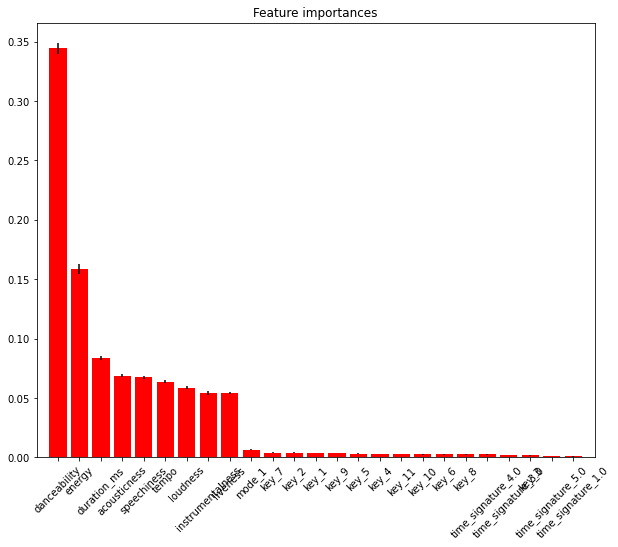

In [43]:
#plot of features
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(X_train1.shape[1]), importances[indices],
        tick_label=[feature_cols[x] for x in indices],
        color="r", yerr=std[indices], align="center")
plt.xlim([-1, X_train1.shape[1]])
_ = plt.xticks(rotation=45)

## For the Classification approach:

### We will scale our numeric variables on a second dataset as they differ in variance which affects the methods we will use later.

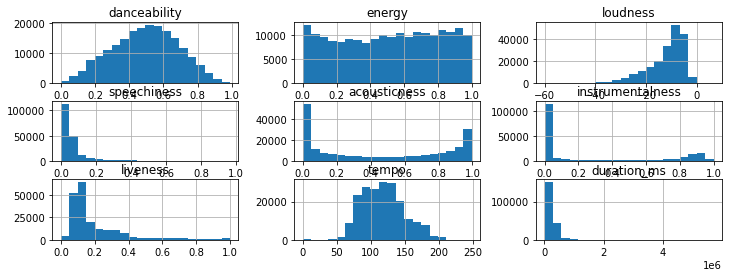

In [44]:
#the predictors before scaling
_ = data_sample[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','tempo','duration_ms']].hist(bins=20, figsize=(12, 4))

In [45]:
#scale them
from sklearn.preprocessing import StandardScaler
data4 = data_sample.copy()
scaler = StandardScaler()
scaler.fit(data4[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','tempo','duration_ms']])
data4[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','tempo','duration_ms']] = scaler.transform(data4[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','tempo','duration_ms']])


### The features now have mean 0 and variance 1.

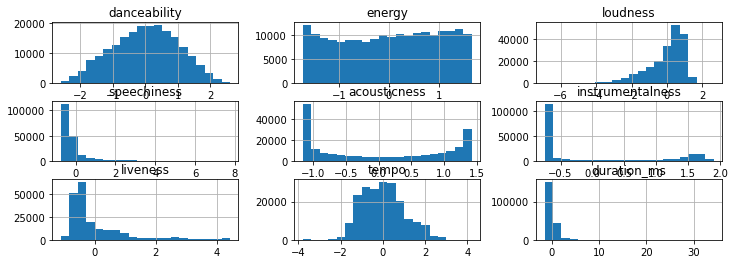

In [46]:
#the predictors after scaling
_ = data4[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','tempo','duration_ms']].hist(bins=20, figsize=(12, 4))

### Then, we must first convert valence to a categorical variable and split it to ordered levels. We split it to 4 ordered levels: sad - melancholic - uplifting - joyful, according to track's mood.

In [47]:
#insert new column with labels
bins =[0,0.25,0.5,0.75,1]
data4['valence_cat'] = pd.cut(data4.valence,bins,include_lowest=True,labels=['sad','melancholic','uplifting','joyful'])
#turn labels to ordered numbers 
data4['valence_cat'] = data4['valence_cat'].astype('category')
data4['valence_cat'] = data4['valence_cat'].cat.codes
#drop valence column
data4 = data4.drop('valence', axis=1)

### We will separate our dataset to training and testing datasets to avoid overfitting. The testing dataset will be 25% of the initial.

In [48]:
# Get 2 dataframes with the values of independent and dependent variables
X2, y2 = (data4.loc[:, data4.columns != 'valence_cat'].values, 
        data4['valence_cat'].values)

# Split them both into a training and a testing set
# Test set will be the 25% of the initials taken randomly
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, 
                                                    random_state=33)

## 1) Stochastic Gradient Descent Classification

### The method tries to find a linear scoring function that will describe our data xi and its features based on some modelling parameters, so that the training error for n observations is minimized. The training error is calculated via the sum of a loss function and a regulization term that penalizes model's complexity.

In [49]:
from sklearn.linear_model import SGDClassifier
#create model with the SGDC method
clf1 = SGDClassifier(alpha=0.001, max_iter=10000, tol=-np.inf, random_state=13,n_jobs=-1)
#train model
clf1.fit(X_train2, y_train2)

SGDClassifier(alpha=0.001, max_iter=10000, n_jobs=-1, random_state=13, tol=-inf)

### We will use the Mean Absolute Error to evaluate our model

In [50]:
#the predicted values
y_pred = clf1.predict(X_test2)
#the MAE test
mae1 = metrics.mean_absolute_error(y_pred,y_test2)
print(f'Mean Absolute Error: {mae1}')

Mean Absolute Error: 0.74978


## 2) Gaussian Naive Bayes classifier using PCA

### We create a pipeline that will run PCA and GNBC in a sequence. Firstly, PCA will reduce the number of variables to 9 by creating 9 principal components which retain as much as possible of the characteristics of the initial dimensions. Afterwards, GNBC will segment continuous variables to classes and match the attributes of each observation to the class with the highest probability to belong, having as a scope to maximize the product of the probabilities of all attributes of an observation yi. 

In [51]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB

#create model
clf2 = make_pipeline(PCA(n_components=9), GaussianNB())
#train model
clf2.fit(X_train2, y_train2)
#the predicted values
pred_test_std = clf2.predict(X_test2)

### We will use the Mean Absolute Error to evaluate our model

In [52]:
mae2 = metrics.mean_absolute_error(y_test2, pred_test_std)
#check accuracy and MAE
print(f'Prediction accuracy: {metrics.accuracy_score(y_test2, pred_test_std):.2%}')
print(f'Mean Absolute Error: {mae2}')

Prediction accuracy: 46.77%
Mean Absolute Error: 0.70222


## 3) Random Forest

### Random forest method uses decision trees to perform multi-class classification on the dataset having as reference to minimize the Gini index which measures the probability that if we pick an item at random this will be classified wrongly. The collection of trees is uncorrelated and not affected by a very strong predictor in the data set offering us completely different trees.

### As scaling is not needed for this method, we will use our initial dataset of 200.000 observations after performing the appropriate transformations.

In [53]:
data3 = data_sample.copy()
#insert new column with labels
bins =[0,0.25,0.5,0.75,1]
data3['valence_cat'] = pd.cut(data.valence,bins,include_lowest=True,labels=['sad','melancholic','uplifting','joyful'])
#turn labels to ordered numbers 
data3['valence_cat'] = data3['valence_cat'].astype('category')
data3['valence_cat'] = data3['valence_cat'].cat.codes
#drop valence column
data3 = data3.drop('valence', axis=1)

In [54]:
# Get 2 dataframes with the values of independent and dependent variables
X3, y3 = (data3.loc[:, data3.columns != 'valence_cat'].values, 
        data3['valence_cat'].values)

# Split them both into a training and a testing set
# Test set will be the 25% of the initials taken randomly
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, 
                                                    random_state=33)

### The method:

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
feature_cols = [ col for col in data3.columns if col != 'valence_cat' ]
#create trees
clf3 = RandomForestClassifier(n_estimators=50, max_depth=None,
                                min_samples_split=2)
#train the tree
clf3.fit(X_train3, y_train3)

#cross validation
scores = cross_val_score(clf3, data3.loc[:, feature_cols], 
                         data3['valence_cat'], cv=5)
#average accuracy
scores.mean()               

0.5254099999999999

### We will use the Mean Absolute Error to evaluate our method. The Random Forest method is the best for classification.

In [56]:
#test tree
predicted = clf3.predict(X_test3)
#mae
metrics.mean_absolute_error(y_test3,predicted)

0.57976

## Importance of variables for best Classification model:

### We get an overall summary of the importance of each predictor in our best model. Danceability seems to describe valence the most on a rate of 15% being followed by energy of 12% and loudness, duration_ms, acousticness of 10% creating the top-5 of features to describe valence.  It seems that dancing and loud songs, that are full of energy and are characterized by acousticness and larger duration are happier than other songs. The classification approach gives more importance to loudness instead of speachiness in contrast to the regression model. Finally, it seems that the ML method is not affected by the pairwised correlation between energy and loudness, acousticness which we faced and dealt with in our statistical model by dropping acousticness and loudness in order to avoid multicollinearity.

In [57]:
importances = clf3.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf3.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X_train3.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], feature_cols[indices[f]], importances[indices[f]]))

1. feature 0 danceability (0.156156)
2. feature 1 energy (0.118225)
3. feature 2 loudness (0.098692)
4. feature 8 duration_ms (0.095252)
5. feature 4 acousticness (0.092826)
6. feature 3 speechiness (0.088885)
7. feature 7 tempo (0.088297)
8. feature 6 liveness (0.081484)
9. feature 5 instrumentalness (0.079916)
10. feature 20 mode_1 (0.012000)
11. feature 15 key_7 (0.009089)
12. feature 10 key_2 (0.008868)
13. feature 17 key_9 (0.008270)
14. feature 12 key_4 (0.006976)
15. feature 13 key_5 (0.006843)
16. feature 9 key_1 (0.006718)
17. feature 19 key_11 (0.006588)
18. feature 18 key_10 (0.006194)
19. feature 23 time_signature_4.0 (0.006183)
20. feature 16 key_8 (0.005702)
21. feature 14 key_6 (0.005652)
22. feature 22 time_signature_3.0 (0.004629)
23. feature 11 key_3 (0.003412)
24. feature 24 time_signature_5.0 (0.001747)
25. feature 21 time_signature_1.0 (0.001393)


### We also plot the importances.

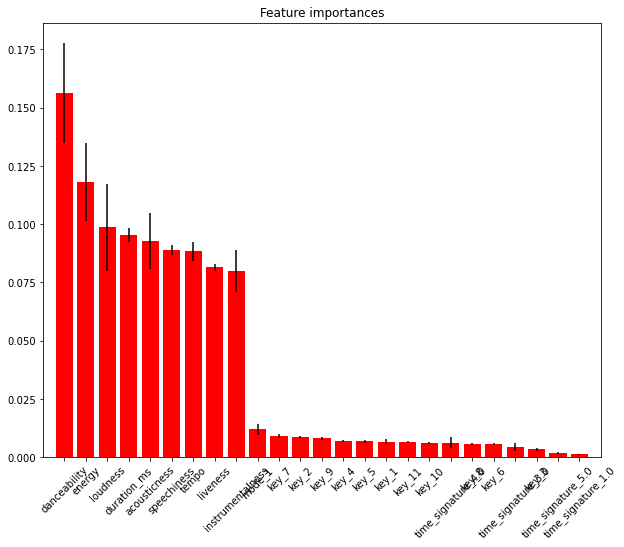

In [58]:
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(X_train3.shape[1]), importances[indices],
        tick_label=[feature_cols[x] for x in indices],
        color="r", yerr=std[indices], align="center")
plt.xlim([-1, X_train3.shape[1]])
_ = plt.xticks(rotation=45)

## Conclusion

### Based on the Regression approach and the Random Forest Regression, the best model clf has metric mean absolute error equal to 0.14 which is very good but it is needed to be checked with an out of sample in order to make sure it is not overfitted.
### Based on the Classification approach, the best model, having mean absolute error equal to 0.58, is clf3 which resulted from the Random Forest Classification method.
### The 5 most important variables affecting valence the most are set to be: danceability, energy, duration_ms, loudness, acousticness and speechiness. 

# Retraining of best model

### As we chose our best model is the Random Forest Rergression model, we will retrain in it on the whole dataset.

In [59]:
# create dummies 
data = pd.get_dummies(data, columns=['key'], drop_first=True)
data = pd.get_dummies(data, columns=['mode'], drop_first=True)
data = pd.get_dummies(data, columns=['time_signature'], drop_first=True)

In [60]:
# Get 2 dataframes with the values of independent and dependent variables
X, y = (data.loc[:, data.columns != 'valence'].values, 
        data['valence'].values)

# Split them both into a training and a testing set
# Test set will be the 25% of the initials taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=33)

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
#the method
clf_final = RandomForestRegressor(n_estimators = 50, max_depth=None,min_samples_split=2, random_state = 0,n_jobs=-1)
#train the method
clf_final.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=0)

In [62]:
#predictions
y_pred = clf_final.predict(X_test)

In [63]:
mae = metrics.mean_absolute_error(y_pred,y_test)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.13909926361291078


# Random Sample Predictability 

### We will use some randomly given track ids to test the predictability of our best model over them. 

### To do so, we must first scrap our data from Spotify based on tracks' ids. We will use an API for Spotify to do so.

In [64]:
#import API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

### Import the csv file of track ids and check for dublicates.

In [65]:
#import the csv file (the initial was a txt file and we convert it to csv)
data_test = pd.read_csv("spotify_ids.csv", header=None)
data_test = data_test.rename(columns={0:"track_id"})
#all values are unique
data_test = data_test.drop_duplicates(subset = ["track_id"])
data_test.head()

,track_id
0,7lPN2DXiMsVn7XUKtOW1CS
1,5QO79kh1waicV47BqGRL3g
2,0VjIjW4GlUZAMYd2vXMi3b
3,4MzXwWMhyBbmu6hOcLVD49
4,5Kskr9LcNYa0tpt5f0ZEJx


### We connect to the web API with our credentials

In [66]:
from spotify_config import config

client_credentials_manager = SpotifyClientCredentials(config['client_id'],
                                                      config['client_secret'])
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

### Create a dictionary with all the track ids

In [67]:
features = {}
all_track_ids = list(data_test['track_id'].unique())

### We call for up to 100 tracks' audio features per iteration

In [68]:
start = 0
num_tracks = 100
while start < len(all_track_ids):
    print(f'getting from {start} to {start+num_tracks}')
    tracks_batch = all_track_ids[start:start+num_tracks]
    features_batch = sp.audio_features(tracks_batch)
    features.update({ track_id : track_features 
                     for track_id, track_features in zip(tracks_batch, features_batch) })
    start += num_tracks

getting from 0 to 100
getting from 100 to 200
getting from 200 to 300
getting from 300 to 400
getting from 400 to 500
getting from 500 to 600
getting from 600 to 700
getting from 700 to 800
getting from 800 to 900
getting from 900 to 1000
getting from 1000 to 1100
getting from 1100 to 1200


In [69]:
tracks = pd.DataFrame.from_dict(features, orient='index')

### We will clean our dataset so it has the appropriate features to get used in our model.

In [70]:
tracks = tracks.drop(['type','id','uri','track_href','analysis_url'], axis=1)

### We create dummy variables for the categorical variables

In [71]:
# create dummies 
tracks = pd.get_dummies(tracks, columns=['key'], drop_first=True)
tracks = pd.get_dummies(tracks, columns=['mode'], drop_first=True)
tracks = pd.get_dummies(tracks, columns=['time_signature'], drop_first=True)

In [72]:
# Add a dummy column of time signature 1 with 0 values as time_signature_1 was included in the data we trained our model with
tracks.insert(22,'time_signature_1', 0) 

In [73]:
X_final, y_final = (tracks.loc[:, tracks.columns != 'valence'].values, tracks['valence'].values)

### We use the Random Forest Regression model to predict as it is our best model.

In [74]:
y_pred = clf_final.predict(X_final)

### The metric MAE is equal to 0.1495

In [75]:
mae = metrics.mean_absolute_error(y_pred,y_final)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.14957366724039012
